In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
import utils
from utils import Map, Node, MakePath,  Draw, SimpleTest, MassiveTest, DiagonalDistance,  ReadMapFromMovingAIFile
from JPSplus import GetJumpPoint, CheckJumpPoint, traversable, ProcessMap, JPSplus
%matplotlib inline
EPS = 0.000001
import time


In [2]:
height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 13
jGoal = 28
pathLen = 31.9705627

In [5]:
a = [1,2,3,5]
a[::-1].pop()

1

In [18]:

height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . # . # . . . . 
. . . # # . . . . . . . . # # . . . . . . # . . . # . . . .
. . . # # . . . . . . . . # # . . . . . . # # # # . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 6
jGoal = 24
pathLen = 32

In [19]:
taskMap = Map()
taskMap.ReadFromString(mapstr, width, height)
proc_map = ProcessMap(np.array(taskMap.cells))

Path found! Length: 40.38477631085023. Nodes created: 77. Number of steps: 60. Correct: False
CPU times: user 16.4 ms, sys: 1 µs, total: 16.4 ms
Wall time: 15.7 ms


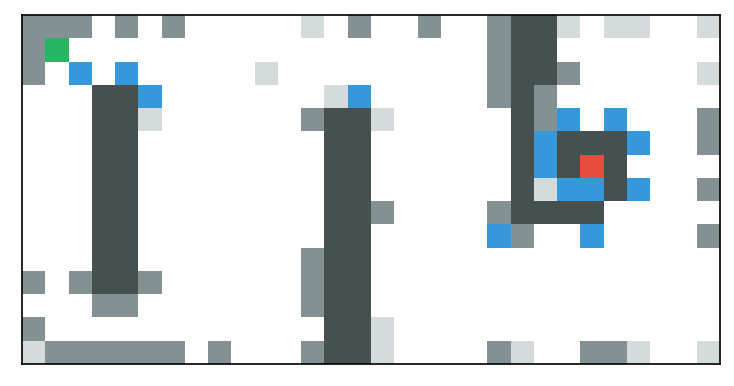

In [20]:
%time SimpleTest(JPSplus, height, width, mapstr, iStart, jStart, iGoal, jGoal, pathLen, proc_map)

In [15]:
proc_maps = []
count = 0
for file in os.listdir("DragonAge/maps"):
    if count > 0:
        break
    taskMap = Map()
    taskFileName = str(file) + ".scen"
    mapFileName = str(file)
    width, height, cells = ReadMapFromMovingAIFile(mapFileName)
    taskMap.SetGridCells(width,height,cells)
    proc_maps.append(ProcessMap(np.array(taskMap.cells)))
    count += 1

In [7]:
start_time = time.time()
MassiveTest(JPSplus, proc_maps)
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.341370344161987 seconds ---


In [13]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
import utils
from utils2 import Map, Node, MakePath,  Draw, SimpleTest, MassiveTest
from JPS import GetDirection, GetJumpPoint, CheckJumpPoint, traversable, GetNeighbours, JPS
%matplotlib inline
EPS = 0.000001

In [14]:
start_time = time.time()
JPSData = MassiveTest(JPS)
print("--- %s seconds ---" % (time.time() - start_time))

NumberMap -  0
--- 7.313891887664795 seconds ---
